## MEAN LINE PLOTTER

A script to automate the plotting of multiple line charts and their mean. Useful for seeing trends in statewide, long-term data, for example.

In [680]:
import datetime 
import numpy as np
import pandas as pd
import plotly.graph_objects as go
import time 

import warnings
warnings.filterwarnings("ignore")

In [682]:
def plotter(dfPLOT, formatting):
        

    ### Plotting    
        
    fig = go.Figure()
        
    ### Add trace
    def addTrace(y_col, line_width, line_color):
        
        fig.add_trace(
            go.Scatter(
                x = dfPLOT.index, 
                y = dfPLOT[y_col].apply(lambda x:round(x,0)),
                name = y_col,
                line = dict(
                    width = line_width, 
                    color = line_color
                )
            )
        )
    
    
    for col in dfPLOT.columns:
        if col != 'mean':
            addTrace(col, formatting['under_lines']['width'], formatting['under_lines']['color'])
    
    ### Now, put the mean line over the top
    addTrace('mean', formatting['mean_line']['width'], formatting['mean_line']['color'])    
    
    ##### Layout 
    ####### Basic
    fig['layout'].update(margin=dict(l=0,r=0,b=0,t=40))
    fig.update_layout(plot_bgcolor='#ffffff', paper_bgcolor='#ffffff')
    fig.update_layout(width=1000, height=600) 
    fig.update_layout(font_family="Inter", font_color="#181818", font_size=12)
    
    ####### Title
    chart_title = title_text=f"<b>{formatting['headline']['main']}</b><br><sup>{formatting['headline']['sub']}</sup><br>"
    fig.update_layout(title_text=chart_title)
    fig.update_layout(title={"x": 0.0115, "y" : 0.96, "yanchor" : "top", "xanchor" : "left"})
    
    fig.update_layout(showlegend=formatting['legend_status'])
    
    fig.show()

### Generate some reandom data to populate the chart with

In [684]:
def getDates(range_upper):
    
    now_timecode = time.time()
    seconds_per_day = 60 * 60 * 24
    yyyymmdd = [round(now_timecode - (seconds_per_day * x)) for x in range(0,range_upper)]
    yyyymmdd = [datetime.datetime.fromtimestamp(x).strftime('%Y-%m-%d') for x in yyyymmdd]
    
    return yyyymmdd

###

def randomSeries(n, range_upper):
        
    n_list = []
    
    trend_lower = np.random.randint(-10, 10)
    trend_upper = np.random.randint(-10, 10)
    trend_range = abs(trend_upper - trend_lower)
    trend_steps = trend_range / range_upper
    if trend_lower == 0:
        trend_lower = 1 
    trend_line = [trend_lower + (trend_steps ** (np.random.randint(1, 100)/10)) for x in range(0, range_upper)]
        
    for i in range(0, range_upper):
        
        r = (np.random.randint(-1001, 1001) / 500)  
        n = n + r * trend_line[i]
        n_list.append(n)
                    
    return n_list

###

def randomDF(shape_rows, shape_randomcolumns):

    df = pd.DataFrame(index = getDates(shape_rows))
    
    for i in range(0, shape_randomcolumns):
        df[f'n{i}'] = randomSeries(np.random.randint(0, 10), shape_rows)
    
    df['mean'] = df.mean(axis = 1)
    
    return df

### Run the scripts

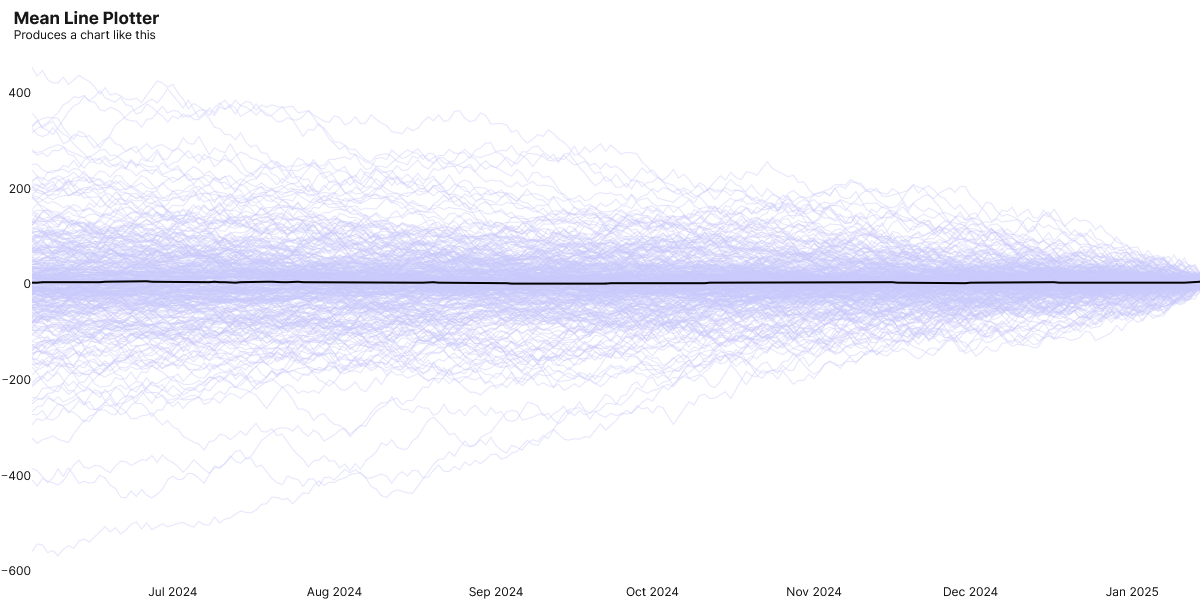

In [688]:
formatting = {
    'headline': {'main': 'Mean Line Plotter', 'sub': 'Produces a chart like this'},
    'mean_line': {'color': 'black', 'width': 2}, 
    'under_lines': {'color': 'rgba(200, 200, 250, 0.5)', 'width': 1}, 
    'legend_status': False
}
    
df = randomDF(np.random.randint(20,365), np.random.randint(4,400))

plotter(df, formatting)